In [28]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [29]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [30]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mel.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mel.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mel.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mel.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [32]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [33]:
X_test = X_test.iloc[:,1:2]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 1, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [34]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 1, 128)        

In [35]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 1, 128)        

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 1, 1), (4233, 1, 1, 1), (4499, 10), (4233, 10))

In [37]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 250
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_mel = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/250
18/18 [==============================] - 2s 41ms/step - loss: 2.2705 - accuracy: 0.1620 - val_loss: 2.2942 - val_accuracy: 0.1082

Epoch 00001: val_loss improved from inf to 2.29420, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/250
18/18 [==============================] - 1s 36ms/step - loss: 2.1973 - accuracy: 0.1800 - val_loss: 2.2944 - val_accuracy: 0.1080

Epoch 00002: val_loss did not improve from 2.29420
Epoch 3/250
18/18 [==============================] - 1s 39ms/step - loss: 2.1954 - accuracy: 0.1814 - val_loss: 2.2918 - val_accuracy: 0.1070

Epoch 00003: val_loss improved from 2.29420 to 2.29182, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 4/250
18/18 [==============================] - 1s 44ms/step - loss: 2.1797 - accuracy: 0.1947 - val_loss: 2.2901 - val_accuracy: 0.1068

Epoch 00004: val_loss improved from 2.29182 to 2.29009, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 5/250
18/18 [=======================


Epoch 00074: val_loss did not improve from 2.17518
Epoch 75/250
18/18 [==============================] - 0s 24ms/step - loss: 2.1171 - accuracy: 0.2160 - val_loss: 2.1871 - val_accuracy: 0.1942

Epoch 00075: val_loss did not improve from 2.17518
Epoch 76/250
18/18 [==============================] - 1s 31ms/step - loss: 2.1156 - accuracy: 0.2103 - val_loss: 2.2055 - val_accuracy: 0.2032

Epoch 00076: val_loss did not improve from 2.17518
Epoch 77/250
18/18 [==============================] - 1s 35ms/step - loss: 2.1106 - accuracy: 0.2194 - val_loss: 2.1892 - val_accuracy: 0.1810

Epoch 00077: val_loss did not improve from 2.17518
Epoch 78/250
18/18 [==============================] - 1s 35ms/step - loss: 2.1104 - accuracy: 0.2169 - val_loss: 2.1893 - val_accuracy: 0.2017

Epoch 00078: val_loss did not improve from 2.17518
Epoch 79/250
18/18 [==============================] - 1s 37ms/step - loss: 2.1069 - accuracy: 0.2223 - val_loss: 2.2416 - val_accuracy: 0.1779

Epoch 00079: val_loss di


Epoch 00116: val_loss did not improve from 2.17518
Epoch 117/250
18/18 [==============================] - 1s 37ms/step - loss: 2.1029 - accuracy: 0.2172 - val_loss: 2.2291 - val_accuracy: 0.1906

Epoch 00117: val_loss did not improve from 2.17518
Epoch 118/250
18/18 [==============================] - 1s 33ms/step - loss: 2.1026 - accuracy: 0.2212 - val_loss: 2.2134 - val_accuracy: 0.1892

Epoch 00118: val_loss did not improve from 2.17518
Epoch 119/250
18/18 [==============================] - 1s 35ms/step - loss: 2.0967 - accuracy: 0.2220 - val_loss: 2.2141 - val_accuracy: 0.1814

Epoch 00119: val_loss did not improve from 2.17518
Epoch 120/250
18/18 [==============================] - 1s 33ms/step - loss: 2.1015 - accuracy: 0.2261 - val_loss: 2.2286 - val_accuracy: 0.1897

Epoch 00120: val_loss did not improve from 2.17518
Epoch 121/250
18/18 [==============================] - 1s 38ms/step - loss: 2.1000 - accuracy: 0.2216 - val_loss: 2.2292 - val_accuracy: 0.1888

Epoch 00121: val_lo


Epoch 00158: val_loss did not improve from 2.17518
Epoch 159/250
18/18 [==============================] - 1s 34ms/step - loss: 2.0943 - accuracy: 0.2240 - val_loss: 2.2025 - val_accuracy: 0.1935

Epoch 00159: val_loss did not improve from 2.17518
Epoch 160/250
18/18 [==============================] - 1s 37ms/step - loss: 2.0984 - accuracy: 0.2223 - val_loss: 2.2016 - val_accuracy: 0.1944

Epoch 00160: val_loss did not improve from 2.17518
Epoch 161/250
18/18 [==============================] - 1s 33ms/step - loss: 2.0944 - accuracy: 0.2258 - val_loss: 2.2151 - val_accuracy: 0.1890

Epoch 00161: val_loss did not improve from 2.17518
Epoch 162/250
18/18 [==============================] - 1s 33ms/step - loss: 2.0957 - accuracy: 0.2283 - val_loss: 2.2219 - val_accuracy: 0.1729

Epoch 00162: val_loss did not improve from 2.17518
Epoch 163/250
18/18 [==============================] - 1s 35ms/step - loss: 2.0943 - accuracy: 0.2203 - val_loss: 2.2158 - val_accuracy: 0.1883

Epoch 00163: val_lo


Epoch 00200: val_loss did not improve from 2.17518
Epoch 201/250
18/18 [==============================] - 1s 41ms/step - loss: 2.0950 - accuracy: 0.2287 - val_loss: 2.2150 - val_accuracy: 0.1836

Epoch 00201: val_loss did not improve from 2.17518
Epoch 202/250
18/18 [==============================] - 1s 41ms/step - loss: 2.0898 - accuracy: 0.2263 - val_loss: 2.2131 - val_accuracy: 0.1859

Epoch 00202: val_loss did not improve from 2.17518
Epoch 203/250
18/18 [==============================] - 1s 39ms/step - loss: 2.0935 - accuracy: 0.2209 - val_loss: 2.2135 - val_accuracy: 0.1958

Epoch 00203: val_loss did not improve from 2.17518
Epoch 204/250
18/18 [==============================] - 2s 88ms/step - loss: 2.0948 - accuracy: 0.2238 - val_loss: 2.2267 - val_accuracy: 0.1795

Epoch 00204: val_loss did not improve from 2.17518
Epoch 205/250
18/18 [==============================] - 1s 59ms/step - loss: 2.0923 - accuracy: 0.2245 - val_loss: 2.2213 - val_accuracy: 0.1911

Epoch 00205: val_lo


Epoch 00242: val_loss did not improve from 2.17518
Epoch 243/250
18/18 [==============================] - 0s 20ms/step - loss: 2.0966 - accuracy: 0.2200 - val_loss: 2.2121 - val_accuracy: 0.1840

Epoch 00243: val_loss did not improve from 2.17518
Epoch 244/250
18/18 [==============================] - 0s 22ms/step - loss: 2.0876 - accuracy: 0.2223 - val_loss: 2.2213 - val_accuracy: 0.1932

Epoch 00244: val_loss did not improve from 2.17518
Epoch 245/250
18/18 [==============================] - 0s 18ms/step - loss: 2.0920 - accuracy: 0.2303 - val_loss: 2.2196 - val_accuracy: 0.1845

Epoch 00245: val_loss did not improve from 2.17518
Epoch 246/250
18/18 [==============================] - 0s 17ms/step - loss: 2.0865 - accuracy: 0.2301 - val_loss: 2.2224 - val_accuracy: 0.1772

Epoch 00246: val_loss did not improve from 2.17518
Epoch 247/250
18/18 [==============================] - 0s 17ms/step - loss: 2.0956 - accuracy: 0.2218 - val_loss: 2.2008 - val_accuracy: 0.1871

Epoch 00247: val_lo

In [39]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.22738386690616608
Testing Accuracy:  0.1833215206861496


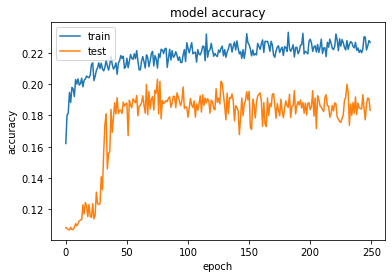

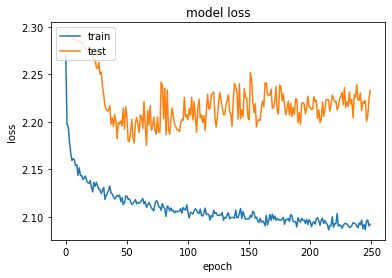

In [40]:
# summarize history for accuracy
plt.plot(model_mel.history['accuracy'])
plt.plot(model_mel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mel.history['loss'])
plt.plot(model_mel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
train_hist = pd.DataFrame(model_mel.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.270526,0.162036,2.294202,0.108197
1,2.197259,0.180040,2.294377,0.107961
2,2.195405,0.181374,2.291822,0.107016
3,2.179661,0.194710,2.290086,0.106780
4,2.167565,0.188264,2.289289,0.108434
...,...,...,...,...
245,2.086510,0.230051,2.222377,0.177179
246,2.095588,0.221827,2.200835,0.187101
247,2.096711,0.224272,2.205554,0.191117
248,2.090487,0.227828,2.223818,0.190645


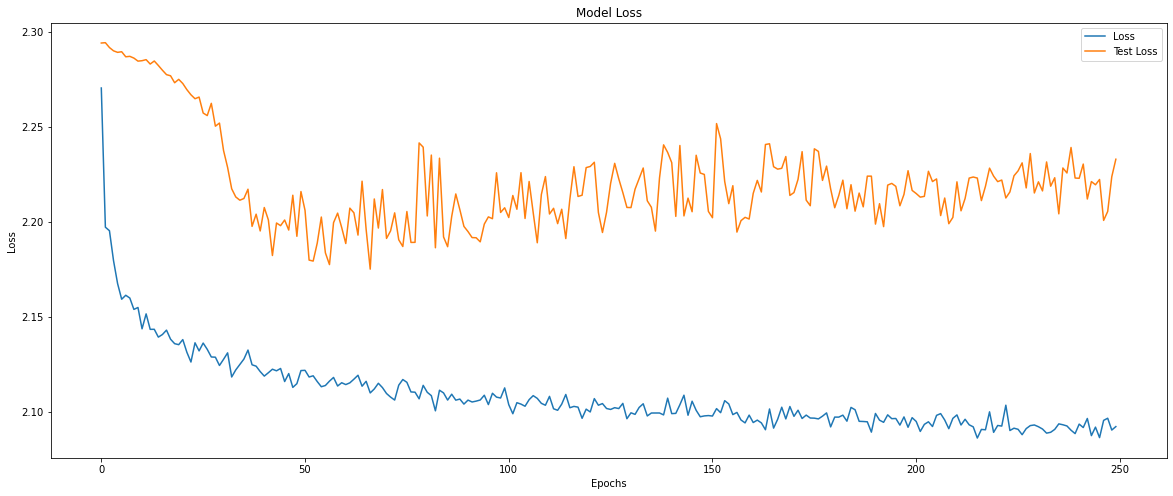

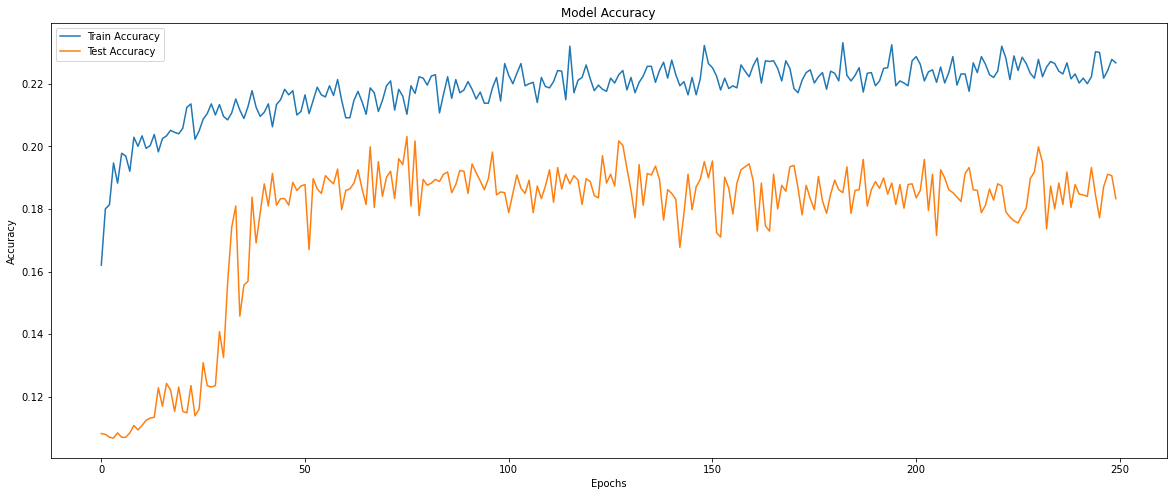

In [42]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [43]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 60   0 155   0   3  71   4 206   1   0]
 [ 29   0  24   1   5  51   0 106   5   0]
 [ 28   0 333   0   4  93   3  33   6   0]
 [ 38   0 175  10   9  95   3 142  28   0]
 [ 71   0 100   1   9 140   3 174   2   0]
 [ 78   0  92  55   7 128  10  62  51   0]
 [ 13   0  37   7   3  30  18  48  28   0]
 [ 37   0  96   0   8 141   0 167   3   0]
 [ 42   0 154   1   1  75  12  57  51   0]
 [ 48   0 100   7   8 129   6 178  24   0]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.14      0.12      0.13       500
           1       0.00      0.00      0.00       221
           2       0.26      0.67      0.38       500
           3       0.12      0.02      0.03       500
           4       0.16      0.02      0.03       500
           5       0.13      0.27      0.18       483
           6       0.31      0.10      0.15       184
           7       0.14      0.37      0.21       452
           8       0.26      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta